In [2]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

#chart the path
happiness_path= "/Users/juliencounts/Desktop/Data_Analysis/Project_1/Data-Analysis-Project-1/Resources/Resources/World_Happiness_Report.csv"
 
#Reading the data in
happiness_complete= pd.read_csv(happiness_path)
happiness_complete.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


Text(0, 0.5, 'Happiness Level')

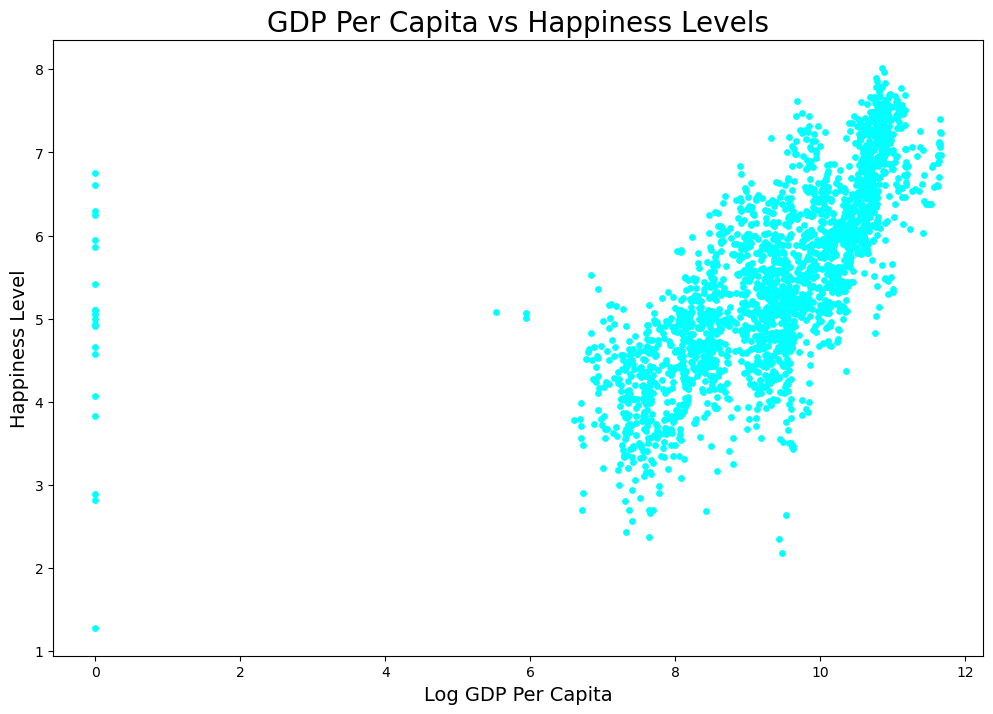

In [98]:
#Creating series for GDP and Happiness Levels
gdp= happiness_complete["Log GDP Per Capita"]
good_vibes= happiness_complete['Life Ladder']

#Cleaning the data and combining it into a single dataframe
gdp_clean= gdp.fillna(0)
good_vibes_clean= good_vibes.fillna(0)
assignment1= pd.concat([gdp_clean, good_vibes_clean], axis=1)
assignment1.head()

#Creating the scatterplot
fig1, ax1 = plt.subplots(figsize=(12, 8))
marker_size=14
plt.scatter(assignment1['Log GDP Per Capita'], assignment1['Life Ladder'],s=15, color="cyan")
plt.title("GDP Per Capita vs Happiness Levels",fontsize =20)
plt.xlabel("Log GDP Per Capita",fontsize =14)
plt.ylabel("Happiness Level",fontsize =14)

Happiness Level = 0.5x + 0.82


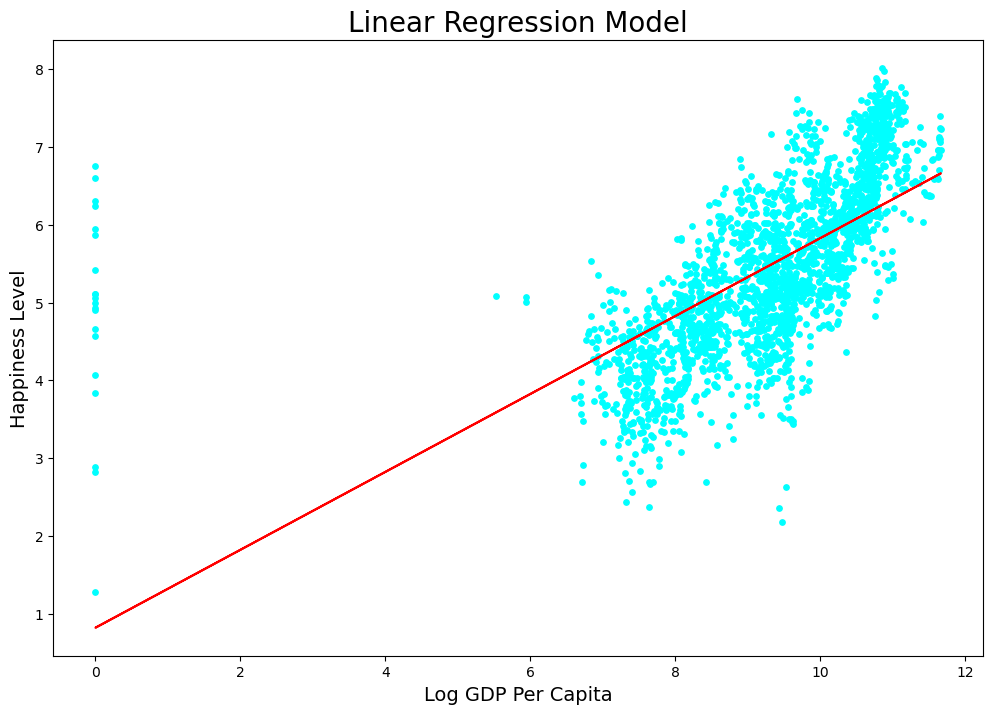

In [100]:
#Building the linear regression model with line of best fit
x_values = assignment1['Log GDP Per Capita']
y_values = assignment1['Life Ladder']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "Happiness Level = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(x_values,y_values, s=15, color="cyan")
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression Model", fontsize=20)
plt.xlabel("Log GDP Per Capita", fontsize =14)
plt.ylabel("Happiness Level", fontsize=14)
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=16,color="red")
plt.show()

In [305]:
#Question 2: creating dataframe for happiness by year 
year= pd.Series(happiness_complete["Year"])
happiness= pd.Series(happiness_complete["Life Ladder"])
assignment2= pd.merge(year, happiness, right_index= True, left_index= True)
assignment2

#Find average happiness by year
mean_happiness= assignment2.groupby(['Year']).mean('Life Ladder').reset_index()
mean_happiness

,Year,Life Ladder
0,2005,6.446164
1,2006,5.196935
2,2007,5.418291
3,2008,5.418554
4,2009,5.457640
5,2010,5.496782
6,2011,5.424088
7,2012,5.443612
8,2013,5.393302
9,2014,5.386267


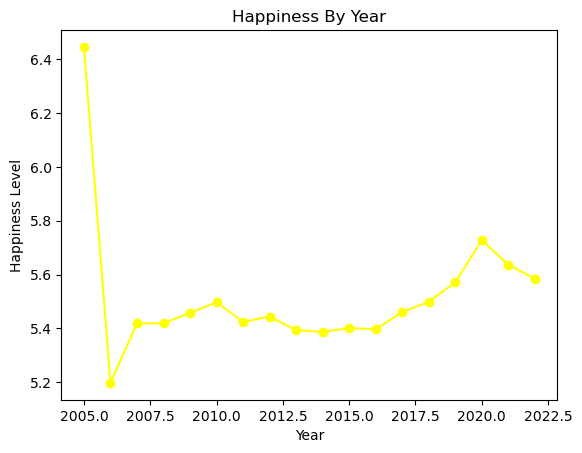

In [309]:
#Creating a line graph of happiness by year
x_axis = mean_happiness["Year"]
y_axis= mean_happiness["Life Ladder"]
plt.plot(x_axis, y_axis, color='yellow', marker='o')
plt.title('Happiness By Year')
plt.xlabel('Year')
plt.ylabel('Happiness Level')
plt.show()